In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
# from new_Adam import *
import no_gpu
import reproducible

In [4]:
import time

In [5]:
X_train, X_val, y_train, y_val = mnist_prep()

In [6]:
# use samller dataset for increased speed
X_train_small = X_train[:1000, :]
X_val_small = X_val[:500, :]
y_train_small = y_train[:1000]
y_val_small = y_val[:500]

n_cols = X_train_small.shape[1]

Epoch 1/10
10/10 [==============================] - 0s 14ms/step - loss: 2.1584 - accuracy: 0.2450 - val_loss: 1.9529 - val_accuracy: 0.4460
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5613 - accuracy: 0.5980 - val_loss: 1.4080 - val_accuracy: 0.6080
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.7450 - val_loss: 0.9410 - val_accuracy: 0.7340
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.8460 - val_loss: 0.7272 - val_accuracy: 0.7880
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8900 - val_loss: 0.6052 - val_accuracy: 0.8200
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.9230 - val_loss: 0.5334 - val_accuracy: 0.8340
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.8460
Epoch 8/10
10/10 [=

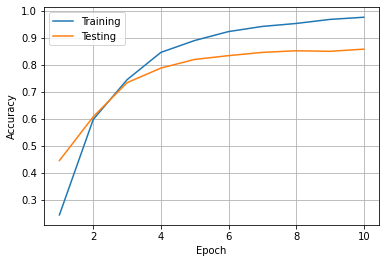

In [7]:
model = nn_model_structure(layers = 5,
                           neurons = [128, 128, 64, 32, 10],
                           n_cols = X_train_small.shape[1])
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = 100,
                     epochs = 10)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model)
# nn_save(model, "../models/model_test_small.h5")

In [8]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.01743369, -0.0448595 ,  0.01700593, ..., -0.08100501,
         -0.039437  , -0.01738876],
        [-0.05974199, -0.0050594 ,  0.01806217, ..., -0.04069512,
          0.04969868,  0.03359859],
        [-0.04995032,  0.06309575, -0.00772937, ..., -0.05693629,
          0.03480571, -0.04803716],
        ...,
        [ 0.06142421, -0.00991699,  0.04870585, ..., -0.05468635,
          0.06899758,  0.00282843],
        [-0.04510133,  0.04147224, -0.05598278, ...,  0.01716213,
         -0.0297642 ,  0.09859083],
        [-0.09908427,  0.00187593,  0.08837842, ...,  0.04840584,
          0.01531912,  0.0097312 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.02348164, -0.089034  ,  0.05252796,  0.01394699,  0.05079414,
         0.03175759, -0.03979543, -0.05302937, -0.09763163,  0.04668165,
         0.06288727,  0.09128142,  0.02145271,  0.13608663,  0.02263461,
    

In [9]:
model.history.history

{'loss': [2.158393621444702,
  1.5612510442733765,
  0.9703549146652222,
  0.5888119339942932,
  0.41105201840400696,
  0.296622097492218,
  0.22609372437000275,
  0.17693744599819183,
  0.14506930112838745,
  0.11211423575878143],
 'accuracy': [0.24500000476837158,
  0.5979999899864197,
  0.7450000047683716,
  0.8460000157356262,
  0.8899999856948853,
  0.9229999780654907,
  0.9419999718666077,
  0.953000009059906,
  0.9679999947547913,
  0.9760000109672546],
 'val_loss': [1.952919363975525,
  1.40803861618042,
  0.9409956932067871,
  0.7272205352783203,
  0.6051856279373169,
  0.5333805680274963,
  0.5090461373329163,
  0.47035834193229675,
  0.4585632383823395,
  0.44959965348243713],
 'val_accuracy': [0.44600000977516174,
  0.6079999804496765,
  0.734000027179718,
  0.7879999876022339,
  0.8199999928474426,
  0.8339999914169312,
  0.8460000157356262,
  0.8519999980926514,
  0.8500000238418579,
  0.8579999804496765]}

In [10]:
model.evaluate(X_val_small, y_val_small)

16/16 [==============================] - 0s 626us/step - loss: 0.4496 - accuracy: 0.8580


[0.44959962368011475, 0.8579999804496765]

In [11]:
model.predict(X_val_small)

array([[5.1871120e-05, 2.2151841e-07, 6.8889099e-06, ..., 9.9933594e-01,
        2.4119436e-05, 4.0507389e-04],
       [9.8743849e-04, 4.3921595e-04, 3.9604816e-01, ..., 4.9842383e-06,
        1.0664213e-02, 3.7662944e-04],
       [1.2377731e-04, 9.9699187e-01, 8.7631459e-04, ..., 3.9775882e-04,
        4.5963639e-04, 1.5690566e-04],
       ...,
       [7.8206992e-04, 2.2852944e-02, 2.6823943e-03, ..., 2.1319264e-03,
        9.3387693e-02, 1.9266120e-01],
       [5.0053579e-01, 2.2155753e-05, 3.5820817e-04, ..., 1.6167903e-02,
        3.0669633e-02, 4.1720107e-01],
       [4.8615030e-04, 2.8751020e-03, 1.6717300e-02, ..., 7.6048214e-05,
        4.5934524e-02, 2.3984514e-02]], dtype=float32)

In [12]:
model.predict_proba(X_val_small)

Instructions for updating:
Please use `model.predict()` instead.


array([[5.1871120e-05, 2.2151841e-07, 6.8889099e-06, ..., 9.9933594e-01,
        2.4119436e-05, 4.0507389e-04],
       [9.8743849e-04, 4.3921595e-04, 3.9604816e-01, ..., 4.9842383e-06,
        1.0664213e-02, 3.7662944e-04],
       [1.2377731e-04, 9.9699187e-01, 8.7631459e-04, ..., 3.9775882e-04,
        4.5963639e-04, 1.5690566e-04],
       ...,
       [7.8206992e-04, 2.2852944e-02, 2.6823943e-03, ..., 2.1319264e-03,
        9.3387693e-02, 1.9266120e-01],
       [5.0053579e-01, 2.2155753e-05, 3.5820817e-04, ..., 1.6167903e-02,
        3.0669633e-02, 4.1720107e-01],
       [4.8615030e-04, 2.8751020e-03, 1.6717300e-02, ..., 7.6048214e-05,
        4.5934524e-02, 2.3984514e-02]], dtype=float32)

In [13]:
model.output

<tf.Tensor 'dense_4/Identity:0' shape=(None, 10) dtype=float32>

In [14]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[ 0.01743369, -0.0448595 ,  0.01700593, ..., -0.08100501,
        -0.039437  , -0.01738876],
       [-0.05974199, -0.0050594 ,  0.01806217, ..., -0.04069512,
         0.04969868,  0.03359859],
       [-0.04995032,  0.06309575, -0.00772937, ..., -0.05693629,
         0.03480571, -0.04803716],
       ...,
       [ 0.06142421, -0.00991699,  0.04870585, ..., -0.05468635,
         0.06899758,  0.00282843],
       [-0.04510133,  0.04147224, -0.05598278, ...,  0.01716213,
        -0.0297642 ,  0.09859083],
       [-0.09908427,  0.00187593,  0.08837842, ...,  0.04840584,
         0.01531912,  0.0097312 ]], dtype=float32), array([ 0.02348164, -0.089034  ,  0.05252796,  0.01394699,  0.05079414,
        0.03175759, -0.03979543, -0.05302937, -0.09763163,  0.04668165,
        0.06288727,  0.09128142,  0.02145271,  0.13608663,  0.02263461,
        0.03631721, -0.02798883, -0.08789513, -0.02679842,  0.05488101,
       -0.10633293, -0.04729812, -0.1457771 , -0.02851487, -0.0369934 ,
        0.

      dtype=float32)]


In [15]:
weights = model.get_weights()
print(weights)

[array([[ 0.01743369, -0.0448595 ,  0.01700593, ..., -0.08100501,
        -0.039437  , -0.01738876],
       [-0.05974199, -0.0050594 ,  0.01806217, ..., -0.04069512,
         0.04969868,  0.03359859],
       [-0.04995032,  0.06309575, -0.00772937, ..., -0.05693629,
         0.03480571, -0.04803716],
       ...,
       [ 0.06142421, -0.00991699,  0.04870585, ..., -0.05468635,
         0.06899758,  0.00282843],
       [-0.04510133,  0.04147224, -0.05598278, ...,  0.01716213,
        -0.0297642 ,  0.09859083],
       [-0.09908427,  0.00187593,  0.08837842, ...,  0.04840584,
         0.01531912,  0.0097312 ]], dtype=float32), array([ 0.02348164, -0.089034  ,  0.05252796,  0.01394699,  0.05079414,
        0.03175759, -0.03979543, -0.05302937, -0.09763163,  0.04668165,
        0.06288727,  0.09128142,  0.02145271,  0.13608663,  0.02263461,
        0.03631721, -0.02798883, -0.08789513, -0.02679842,  0.05488101,
       -0.10633293, -0.04729812, -0.1457771 , -0.02851487, -0.0369934 ,
        0.

In [16]:
y_true, y_pred = nn_class_pred_true(model, X_val_small, y_val_small, print_comp = True)

Prediction: 7, Actual: 7, True
Prediction: 2, Actual: 2, True
Prediction: 1, Actual: 1, True
Prediction: 0, Actual: 0, True
Prediction: 4, Actual: 4, True
Prediction: 1, Actual: 1, True
Prediction: 4, Actual: 4, True
Prediction: 9, Actual: 9, True
Prediction: 6, Actual: 5, False
Prediction: 9, Actual: 9, True
Prediction: 0, Actual: 0, True
Prediction: 2, Actual: 6, False
Prediction: 9, Actual: 9, True
Prediction: 0, Actual: 0, True
Prediction: 1, Actual: 1, True
Prediction: 5, Actual: 5, True
Prediction: 9, Actual: 9, True
Prediction: 7, Actual: 7, True
Prediction: 3, Actual: 3, True
Prediction: 4, Actual: 4, True
Prediction: 9, Actual: 9, True
Prediction: 6, Actual: 6, True
Prediction: 4, Actual: 6, False
Prediction: 5, Actual: 5, True
Prediction: 4, Actual: 4, True
Prediction: 0, Actual: 0, True
Prediction: 7, Actual: 7, True
Prediction: 4, Actual: 4, True
Prediction: 0, Actual: 0, True
Prediction: 1, Actual: 1, True
Prediction: 3, Actual: 3, True
Prediction: 1, Actual: 1, True
Predi

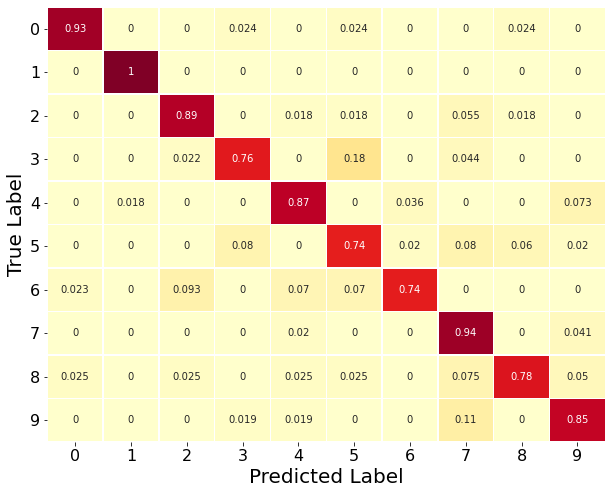

In [17]:
cm = nn_conf_mat(y_true, y_pred)

In [18]:
cm

array([[0.92857143, 0.        , 0.        , 0.02380952, 0.        ,
        0.02380952, 0.        , 0.        , 0.02380952, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.89090909, 0.        , 0.01818182,
        0.01818182, 0.        , 0.05454545, 0.01818182, 0.        ],
       [0.        , 0.        , 0.02222222, 0.75555556, 0.        ,
        0.17777778, 0.        , 0.04444444, 0.        , 0.        ],
       [0.        , 0.01818182, 0.        , 0.        , 0.87272727,
        0.        , 0.03636364, 0.        , 0.        , 0.07272727],
       [0.        , 0.        , 0.        , 0.08      , 0.        ,
        0.74      , 0.02      , 0.08      , 0.06      , 0.02      ],
       [0.02325581, 0.        , 0.09302326, 0.        , 0.06976744,
        0.06976744, 0.74418605, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [19]:
true_acc = model.evaluate(X_val_small, y_val_small)[1]
print(true_acc)
print(model.predict(X_val_small[:3]))

shape_0 = model.get_weights()[0].shape
print(shape_0)

old_first_weights = model.get_weights()[0]

# first_weights = [np.random.normal(size = shape_0)]
first_weights = [model.get_weights()[0]-1]
print(first_weights)
print(first_weights[0].shape)

all_weights = first_weights + model.get_weights()[1:]
# print(all_weights)

model.set_weights(all_weights)

fake_acc = model.evaluate(X_val_small, y_val_small)[1]
print(fake_acc)
print(model.predict(X_val_small[:3]))

old_weights = [old_first_weights] + model.get_weights()[1:]

model.set_weights(old_weights)

old_true_acc = model.evaluate(X_val_small, y_val_small)[1]
print(old_true_acc)
print(model.predict(X_val_small[:3]))

16/16 [==============================] - 0s 626us/step - loss: 0.4496 - accuracy: 0.8580
0.8579999804496765
[[5.1871120e-05 2.2151841e-07 6.8889099e-06 1.6980544e-04 7.3858523e-08
  5.7601496e-06 2.7698491e-07 9.9933594e-01 2.4119436e-05 4.0507334e-04]
 [9.8743953e-04 4.3921603e-04 3.9604861e-01 1.1787073e-01 3.7563322e-04
  2.8644052e-01 1.8679194e-01 4.9842442e-06 1.0664215e-02 3.7662880e-04]
 [1.2377719e-04 9.9699187e-01 8.7631418e-04 4.9372588e-04 1.8370882e-04
  2.5654777e-05 2.9074677e-04 3.9775824e-04 4.5963639e-04 1.5690552e-04]]
(784, 128)
[array([[-0.9825663 , -1.0448595 , -0.9829941 , ..., -1.081005  ,
        -1.039437  , -1.0173888 ],
       [-1.059742  , -1.0050594 , -0.9819378 , ..., -1.0406951 ,
        -0.95030135, -0.9664014 ],
       [-1.0499504 , -0.93690425, -1.0077294 , ..., -1.0569363 ,
        -0.9651943 , -1.0480372 ],
       ...,
       [-0.9385758 , -1.009917  , -0.9512942 , ..., -1.0546863 ,
        -0.93100244, -0.9971716 ],
       [-1.0451013 , -0.95852774